In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('IMG_marshall.jpeg',0)

In [3]:
img_info = img.shape

In [4]:
height = img_info[0]
width = img_info[1]

In [5]:
#gray = cv2.cvtColor(img,cv2.COLOR_BAYER_BG2GRAY) #CONVERT THE RGB INTO GRAY

In [6]:
count = np.zeros(256,np.float)

In [7]:
for i in range(0, height):
    for j in range(0, width):
        pixel = img[i,j]
        index = int(pixel)
        count[index] = count[index]+1

In [8]:
for i in range(0, 255):
    count[i] = count[i]/(height*width)

In [9]:
x = np.linspace(0, 255, 256)

In [10]:
y = count

<BarContainer object of 256 artists>

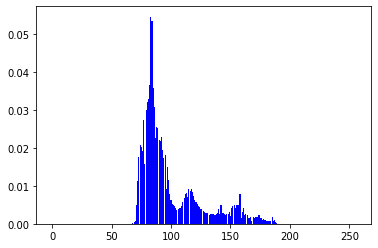

In [11]:
plt.bar(x, y, 0.9, alpha=1, color='b')

In [12]:
for i in range(0, 255):
    if count[i] != 0:
        min = i
        print('the minist number is ',min)
        break

the minist number is  59


In [13]:
for i in range(0,255):
    if count[255-i] != 0:
        max = 255-i
        print('the max number is ', max)
        break

the max number is  197


In [14]:
dst_img = np.zeros((height,width), np.uint8) #0-255
for i in range(0, height):
    for j in range(0, width):
        dst_img[i,j] = ((img[i,j]-min)/(max-min))*255
       

In [15]:
dst_img.shape

(1080, 1440)

In [17]:
def histogram(img):
    img_info = img.shape
    height = img_info[0]
    width = img_info[1]
    count = np.zeros(256,np.float)
    
    for i in range(0, height):
        for j in range(0, width):
            pixel = img[i,j]
            index = int(pixel)
            count[index] = count[index]+1
            
    for i in range(0, 255):
        count[i] = count[i]/(height*width)
    
    x = np.linspace(0, 255, 256)
    y = count
    plt.bar(x, y, 0.9, alpha=1, color='b')

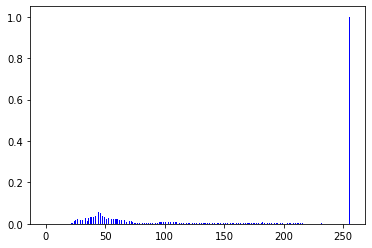

In [18]:
histogram(dst_img)

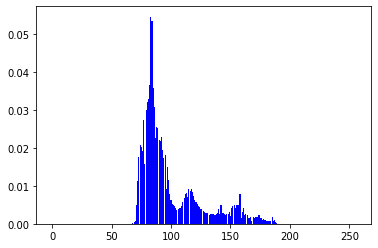

In [19]:
histogram(img)

In [21]:
sum1 = float(0)

In [36]:
count2 = np.zeros(256,float)

In [37]:
for i in range(0, height):
    for j in range(0, width):
        pixel = img[i,j]
        index = int(pixel)
        count2[index] = count2[index]+1

In [41]:
for i in range(0, 255):
    count2[i] = count2[i]/(height*width)

In [43]:
sum1 = float(0)
for i in range(0, 255):
    sum1 = count2[i]+sum1
    count2[i] = sum1

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.43004115e-07
 6.43004115e-07 1.92901235e-06 2.57201646e-06 7.71604938e-06
 2.05761317e-05 3.858024

In [44]:
#calculate mapping
mapping = np.zeros(256, np.uint16)
for i in range(0, 256):
    mapping[i] = count2[i]*255

In [46]:
#mapping
dst_img2 = np.zeros((height,width), np.uint8)

In [47]:
for i in range(0, height):
    for j in range(0, width):
        dst_img2[i,j] = mapping[img[i,j]]

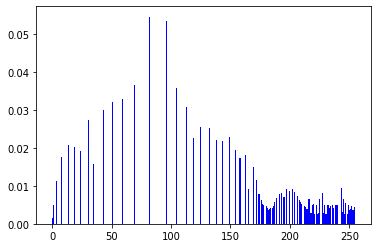

In [49]:
histogram(dst_img2)

In [51]:
cv2.imwrite('IMG_MARSHALL1.jpeg', dst_img, [cv2.IMWRITE_JPEG_QUALITY,80])

True

In [53]:
cv2.imwrite('IMG_MARSHALL2.jpeg', dst_img2, [cv2.IMWRITE_JPEG_QUALITY,80])

True